In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

sns.set()


In [2]:
# Define date range
start_date = "2016-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# Download Bitcoin and Gold price data
btc = yf.download("BTC-USD", start=start_date, end=end_date)
gold = yf.download("GC=F", start=start_date, end=end_date)

btc.head(), gold.head()


C:\Users\baris\AppData\Local\Temp\ipykernel_50424\4265700261.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\baris\AppData\Local\Temp\ipykernel_50424\4265700261.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


(Price            Close        High         Low        Open    Volume
 Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
 Date                                                                
 2016-01-01  434.334015  436.246002  427.515015  430.721008  36278900
 2016-01-02  433.437988  436.062012  431.869995  434.622009  30096600
 2016-01-03  430.010986  433.743011  424.705994  433.578003  39633800
 2016-01-04  433.091003  434.516998  429.084015  430.061005  38477500
 2016-01-05  431.959991  434.182007  429.675995  433.069000  34522600,
 Price             Close         High          Low         Open Volume
 Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
 Date                                                                 
 2016-01-04  1075.099976  1082.500000  1063.199951  1063.400024    143
 2016-01-05  1078.400024  1081.500000  1075.300049  1075.599976     82
 2016-01-06  1091.900024  1093.699951  1081.599976  1081.599976     52
 2016-01-07  

In [3]:
btc_close = btc["Close"]
gold_close = gold["Close"]

btc_close.name = "BTC_Close"
gold_close.name = "Gold_Close"

# Combine into one DataFrame
data = pd.concat([btc_close, gold_close], axis=1)

# Drop missing values
data = data.dropna()

data.head(), data.tail(), data.shape


(Ticker         BTC-USD         GC=F
 Date                               
 2016-01-04  433.091003  1075.099976
 2016-01-05  431.959991  1078.400024
 2016-01-06  429.105011  1091.900024
 2016-01-07  458.048004  1107.699951
 2016-01-08  453.230011  1097.800049,
 Ticker           BTC-USD         GC=F
 Date                                 
 2025-12-08  90640.203125  4187.200195
 2025-12-09  92691.710938  4206.700195
 2025-12-10  92020.945312  4196.399902
 2025-12-11  92511.335938  4285.500000
 2025-12-12  90270.414062  4300.100098,
 (2501, 2))

In [4]:
# Calculate daily simple returns
returns = data.pct_change().dropna()

# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

returns.head(), log_returns.head()


(Ticker       BTC-USD      GC=F
 Date                          
 2016-01-05 -0.002611  0.003070
 2016-01-06 -0.006609  0.012519
 2016-01-07  0.067450  0.014470
 2016-01-08 -0.010519 -0.008937
 2016-01-11 -0.010595 -0.001184,
 Ticker       BTC-USD      GC=F
 Date                          
 2016-01-05 -0.002615  0.003065
 2016-01-06 -0.006631  0.012441
 2016-01-07  0.065272  0.014366
 2016-01-08 -0.010574 -0.008978
 2016-01-11 -0.010652 -0.001185)

In [5]:
data.columns = ["BTC_Close", "Gold_Close"]

data.head()


,BTC_Close,Gold_Close
Date,,
2016-01-04,433.091003,1075.099976
2016-01-05,431.959991,1078.400024
2016-01-06,429.105011,1091.900024
2016-01-07,458.048004,1107.699951
2016-01-08,453.230011,1097.800049


In [6]:
# Fix column names 
returns.columns = ["BTC_Close", "Gold_Close"]
log_returns.columns = ["BTC_Close", "Gold_Close"]

returns.head(), log_returns.head()


(            BTC_Close  Gold_Close
 Date                             
 2016-01-05  -0.002611    0.003070
 2016-01-06  -0.006609    0.012519
 2016-01-07   0.067450    0.014470
 2016-01-08  -0.010519   -0.008937
 2016-01-11  -0.010595   -0.001184,
             BTC_Close  Gold_Close
 Date                             
 2016-01-05  -0.002615    0.003065
 2016-01-06  -0.006631    0.012441
 2016-01-07   0.065272    0.014366
 2016-01-08  -0.010574   -0.008978
 2016-01-11  -0.010652   -0.001185)

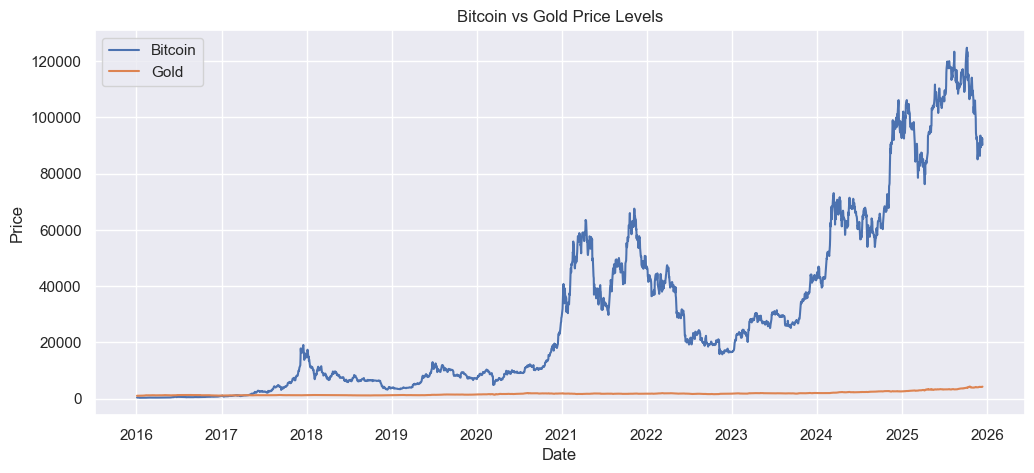

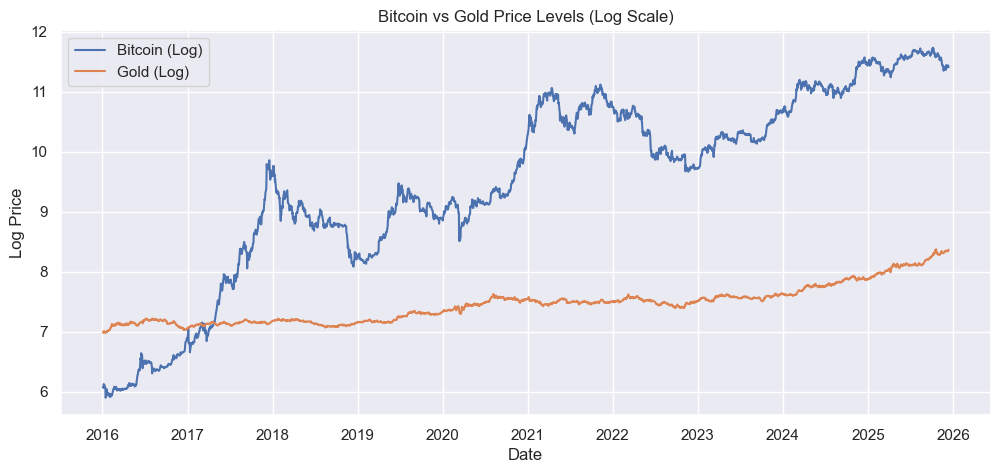

In [7]:
# Price level plot
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["BTC_Close"], label="Bitcoin")
plt.plot(data.index, data["Gold_Close"], label="Gold")
plt.title("Bitcoin vs Gold Price Levels")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Log-scale price plot
plt.figure(figsize=(12, 5))
plt.plot(data.index, np.log(data["BTC_Close"]), label="Bitcoin (Log)")
plt.plot(data.index, np.log(data["Gold_Close"]), label="Gold (Log)")
plt.title("Bitcoin vs Gold Price Levels (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()


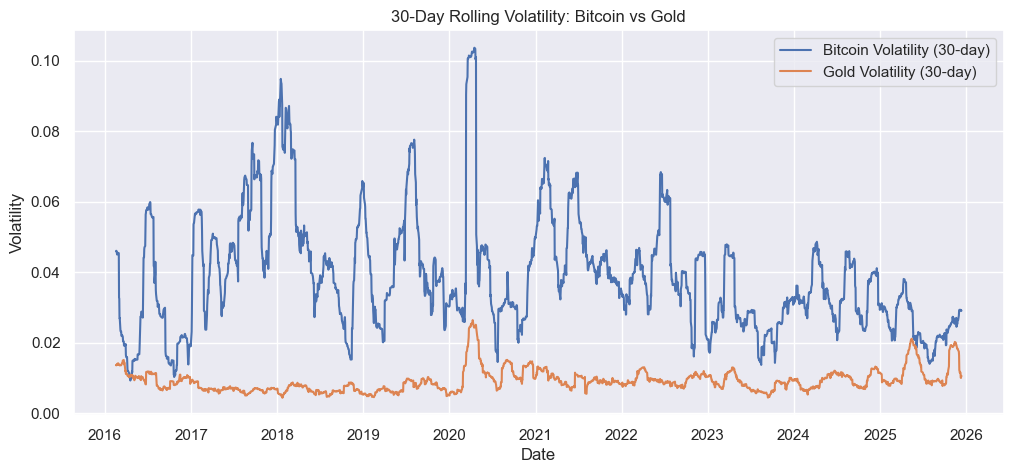

In [8]:
# Calculate rolling 30 day volatility using log returns
rolling_vol = log_returns.rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(12, 5))
plt.plot(rolling_vol.index, rolling_vol["BTC_Close"], label="Bitcoin Volatility (30-day)")
plt.plot(rolling_vol.index, rolling_vol["Gold_Close"], label="Gold Volatility (30-day)")
plt.title("30-Day Rolling Volatility: Bitcoin vs Gold")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


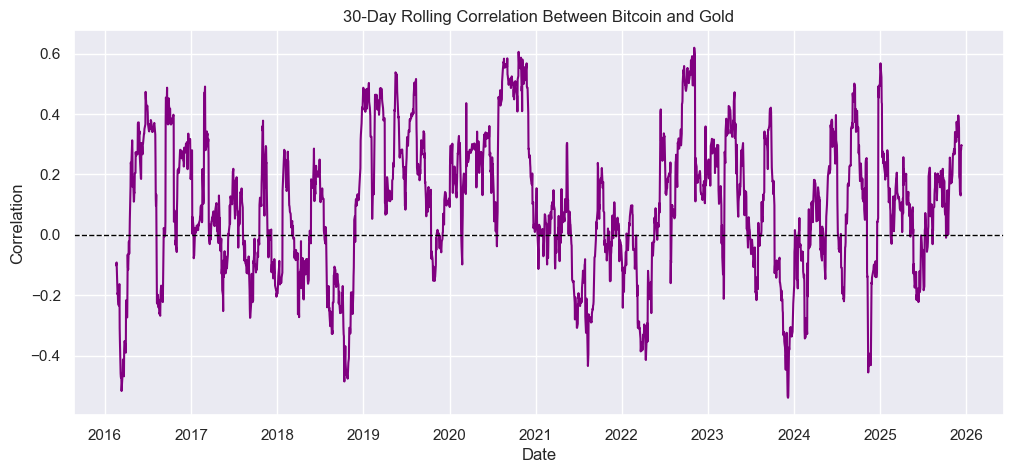

In [ ]:
# Calculate 30 day rolling correlation between Bitcoin and Gold
rolling_corr = log_returns["BTC_Close"].rolling(window=30).corr(
    log_returns["Gold_Close"]
)

# Plot rolling correlation
plt.figure(figsize=(12, 5))
plt.plot(rolling_corr, color="purple")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("30-Day Rolling Correlation Between Bitcoin and Gold")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()


# Phase 2 – Exploratory Data Analysis Summary

The main hypothesis tested in this phase is that Bitcoin behaves similarly to gold
as a store of value, which would imply comparable volatility levels and a stable
positive correlation between their returns.

In this phase, the historical price behavior of Bitcoin and gold is analyzed using daily
price data. Daily returns and log returns are calculated to better compare their movements
over time. The analysis shows that Bitcoin is much more volatile than gold during the entire period, with large fluctuations especially during market stress periods.

The rolling 30 day volatility results clearly indicate that Bitcoin carries a higher risk
compared to gold. While gold prices move in a more stable way, Bitcoin experiences frequent and sharp changes, which makes it less stable as a store of value.

The rolling correlation analysis between Bitcoin and gold shows that their relationship is
not stable over time. Although there are short periods where the correlation becomes
positive, it often moves around zero and changes direction. This suggests that Bitcoin does not consistently behave like gold, even though some similarities may appear during certain market conditions.

Overall, the results of this exploratory analysis do not support the hypothesis,
indicating that Bitcoin behaves differently from gold in terms of volatility and
price stability.


